# Ejercicio ML I

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/neuro/NeuroIA/ejercicios_ml.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<p>Recordá abrir en una nueva pestaña</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

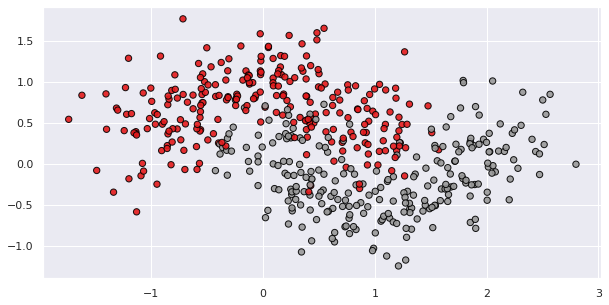

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
sctr = ax.scatter(X[:,0],X[:,1], c=y, edgecolor='black', s=40, alpha=0.9,
                 cmap=plt.cm.Set1)

Ejercicio:

- Ajustar LogisticRegression, RandomForestClassifier y SVC a los datos
- Evaluar el accuracy en train y en test

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Completar
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)])

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


### Ejercicio:

- Separar en Train y Test
- Ajustar un Clasificador KNN
- Medir el accuracy en Test

In [25]:
# Completar

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## k Nearest Neighbor

In [26]:
# Completar
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [28]:
np.mean(y_pred == y_test)

0.98

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Matriz de errores o *confusión*](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


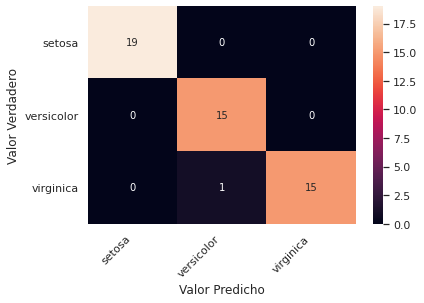

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

heatmap = sns.heatmap(cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(iris['target_names'], rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(iris['target_names'], rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

## Regresión Logística

Ajustar una regresión logística a Iris

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [32]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [33]:
np.mean(y_pred == y_test)

1.0

## Cross Validation

¿Cómo sabemos que nuestra métrica no dio tan bien de casualidad?

Ejercicio:
  - Usar "cross_val_score" para estimar la generalización del modelo

In [34]:
# Completar

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5)

In [35]:
scores

array([1.  , 0.85, 0.95, 1.  , 0.95])

In [36]:
np.mean(scores)

0.95